In [3]:
# Importing the basic libraries for visualization, model building, encoding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [4]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\budde\OneDrive\Desktop\internships\EDUNET\employee_salary_data.csv")
df.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [5]:
# Basic dataset information
print("Shape of the dataset is:",df.shape)
print("\nColumn Names:", df.columns.tolist())

Shape of the dataset is: (48842, 15)

Column Names: ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [6]:
print("Info:")
df.info()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [8]:
# Check for placeholder missing values (like '?')
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].isin(['?']).sum()} values with '?'")

workclass: 2799 values with '?'
education: 0 values with '?'
marital-status: 0 values with '?'
occupation: 2809 values with '?'
relationship: 0 values with '?'
race: 0 values with '?'
gender: 0 values with '?'
native-country: 857 values with '?'
income: 0 values with '?'


In [9]:
# Replacing '?' with NaN and dropping such rows
df_clean = df.replace('?', np.nan)
df_clean.dropna(inplace=True)


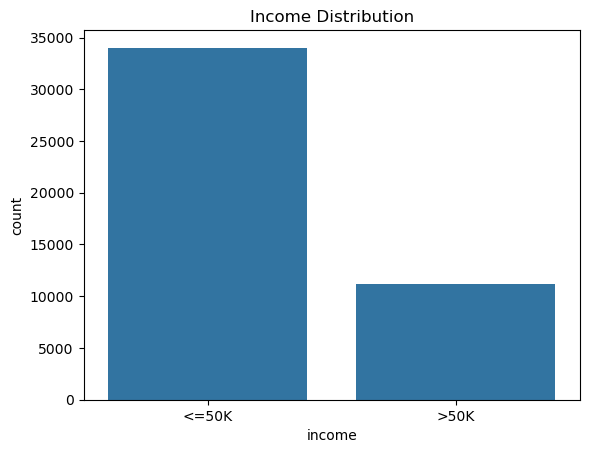

In [10]:
# Income distribution
sns.countplot(x='income', data=df_clean)
plt.title('Income Distribution')
plt.show()

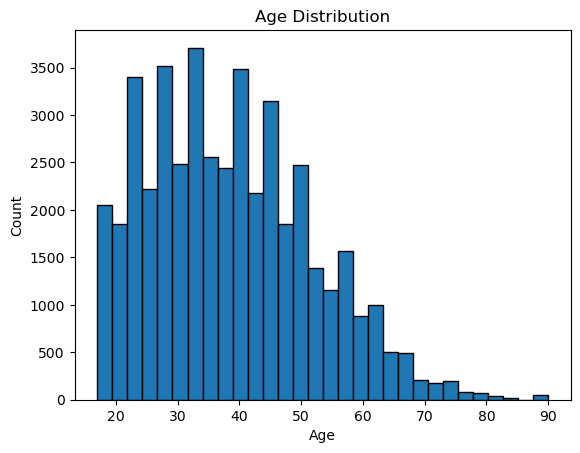

In [11]:
# Age distribution
plt.hist(df_clean['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

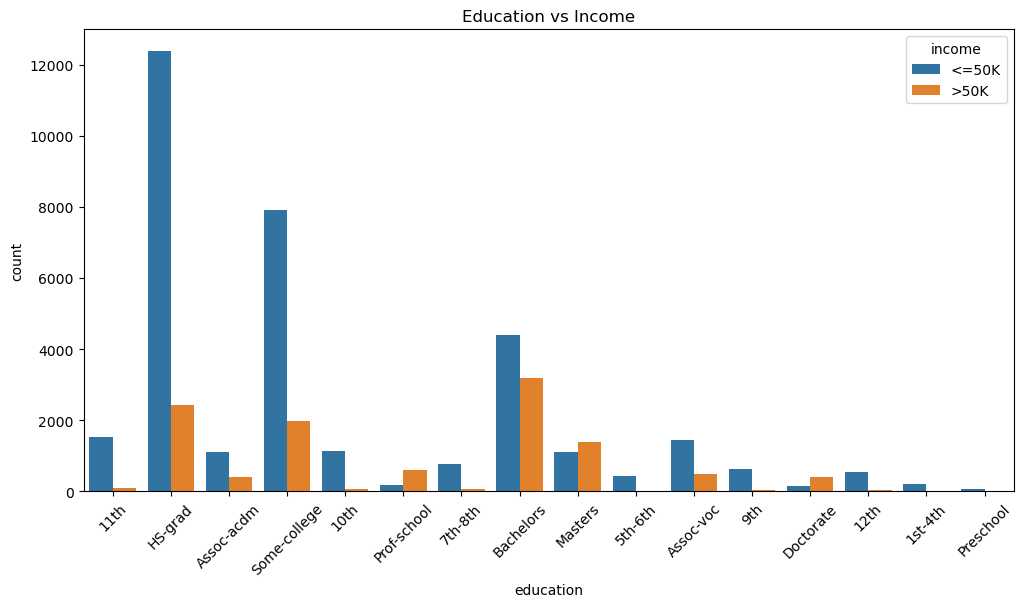

In [12]:
# Education vs Income
plt.figure(figsize=(12,6))
sns.countplot(x='education', hue='income', data=df_clean)
plt.xticks(rotation=45)
plt.title('Education vs Income')
plt.show()

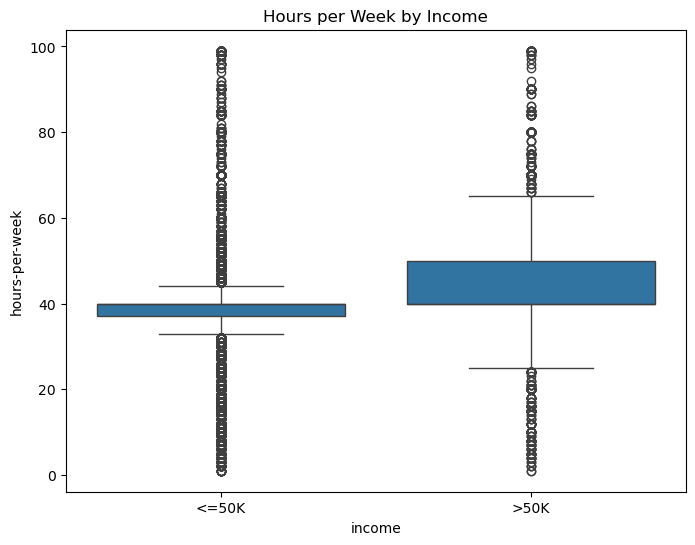

In [13]:
# Hours per week by income
plt.figure(figsize=(8,6))
sns.boxplot(x='income', y='hours-per-week', data=df_clean)
plt.title('Hours per Week by Income')
plt.show()

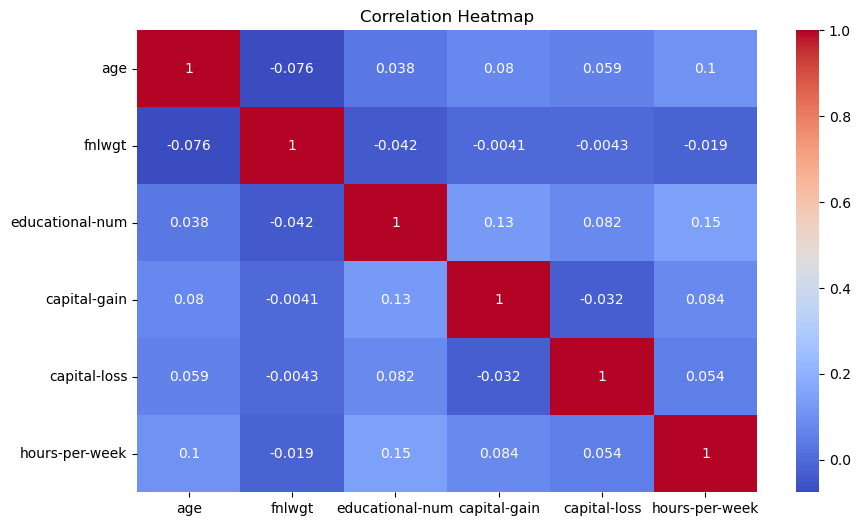

In [14]:
# Correlation heatmap
num_cols = ['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']
plt.figure(figsize=(10,6))
sns.heatmap(df_clean[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

# Converting income and gender to numeric since they have only two categories
le = LabelEncoder()
df_clean['income'] = le.fit_transform(df_clean['income'])
df_clean['gender'] = le.fit_transform(df_clean['gender'])

# One-hot encoding for the rest of the categorical columns
# This will create separate columns for each category
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 
            'relationship', 'race', 'native-country']

df_encoded = pd.get_dummies(df_clean, columns=cat_cols, drop_first=True)


In [16]:
from sklearn.model_selection import train_test_split

# Splitting features and target
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

# Train-test split (using 80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predict and evaluate
lr_pred = lr_model.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("\nClassification Report:\n", classification_report(y_test, lr_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, lr_pred))


Logistic Regression Accuracy: 0.851077943615257

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      6842
           1       0.74      0.60      0.66      2203

    accuracy                           0.85      9045
   macro avg       0.81      0.77      0.78      9045
weighted avg       0.84      0.85      0.85      9045


Confusion Matrix:
 [[6376  466]
 [ 881 1322]]


# Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

rf_pred = rf_model.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))


Random Forest Accuracy: 0.85085682697623

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      6842
           1       0.73      0.61      0.67      2203

    accuracy                           0.85      9045
   macro avg       0.81      0.77      0.79      9045
weighted avg       0.84      0.85      0.85      9045


Confusion Matrix:
 [[6349  493]
 [ 856 1347]]


# K Nearest Neighbor(KNN)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

knn_pred = knn_model.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("\nClassification Report:\n", classification_report(y_test, knn_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, knn_pred))

KNN Accuracy: 0.8220011055831952

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      6842
           1       0.65      0.57      0.61      2203

    accuracy                           0.82      9045
   macro avg       0.76      0.74      0.75      9045
weighted avg       0.82      0.82      0.82      9045


Confusion Matrix:
 [[6181  661]
 [ 949 1254]]


#  Support Vector Machine (SVM)

In [24]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

svm_pred = svm_model.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("\nClassification Report:\n", classification_report(y_test, svm_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, svm_pred))


SVM Accuracy: 0.8519624101713654

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91      6842
           1       0.76      0.57      0.65      2203

    accuracy                           0.85      9045
   macro avg       0.82      0.76      0.78      9045
weighted avg       0.85      0.85      0.84      9045


Confusion Matrix:
 [[6443  399]
 [ 940 1263]]


# Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("\nClassification Report:\n", classification_report(y_test, dt_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, dt_pred))


Decision Tree Accuracy: 0.8132669983416252

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88      6842
           1       0.62      0.60      0.61      2203

    accuracy                           0.81      9045
   macro avg       0.75      0.74      0.74      9045
weighted avg       0.81      0.81      0.81      9045


Confusion Matrix:
 [[6025  817]
 [ 872 1331]]


# CatBoost

In [28]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df_clean.drop('income', axis=1)
y = df_clean['income']

cat_features = ['workclass', 'education', 'marital-status', 'occupation',
                'relationship', 'race', 'native-country', 'gender']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train, cat_features=cat_features)

cat_pred = cat_model.predict(X_test)

print("CatBoost Accuracy:", accuracy_score(y_test, cat_pred))
print("\nClassification Report:\n", classification_report(y_test, cat_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, cat_pred))


CatBoost Accuracy: 0.8735212824765064

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      6842
           1       0.78      0.66      0.72      2203

    accuracy                           0.87      9045
   macro avg       0.84      0.80      0.82      9045
weighted avg       0.87      0.87      0.87      9045


Confusion Matrix:
 [[6442  400]
 [ 744 1459]]


# Model Comparision

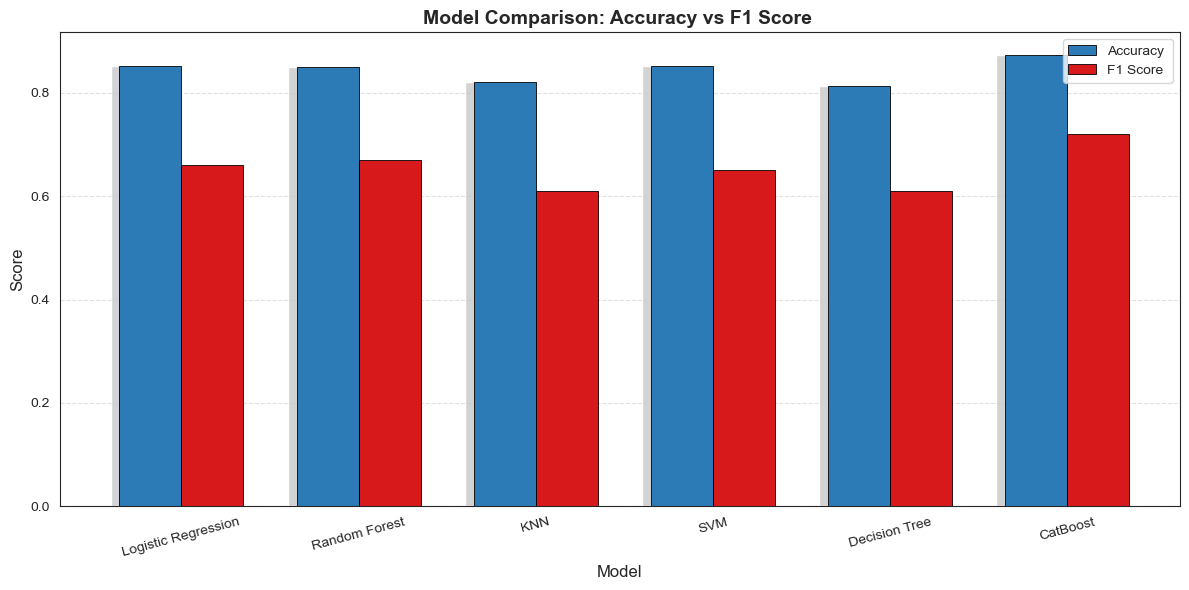

In [30]:
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'KNN', 'SVM', 'Decision Tree', 'CatBoost'],
    'Accuracy': [0.8511, 0.8509, 0.8220, 0.8520, 0.8133, 0.8735],
    'F1_Score': [0.66, 0.67, 0.61, 0.65, 0.61, 0.72]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
sns.set_style("white")

bar_width = 0.35
x = np.arange(len(df['Model']))

# setting the colors
accuracy_color = '#2C7BB6'     # deep blue
f1_color = '#D7191C'           # deep red
shadow_shift = 0.05            # slight shift to create a 3D illusion

# shadow behind bars
plt.bar(x - shadow_shift, df['Accuracy'], width=bar_width, color='lightgray', zorder=0)
plt.bar(x + bar_width - shadow_shift, df['F1_Score'], width=bar_width, color='lightgray', zorder=0)

# data bars
plt.bar(x, df['Accuracy'], width=bar_width, color=accuracy_color, label='Accuracy', edgecolor='black', linewidth=0.6)
plt.bar(x + bar_width, df['F1_Score'], width=bar_width, color=f1_color, label='F1 Score ', edgecolor='black', linewidth=0.6)

# plot setup
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Model Comparison: Accuracy vs F1 Score ', fontsize=14, fontweight='bold')
plt.xticks(x + bar_width / 2, df['Model'], rotation=15)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [35]:
import joblib

# saving the trained CatBoost model
joblib.dump(cat_model, '../models/catboost_salary_model.pkl')

# saving the list of categorical features used during training
joblib.dump(cat_features, '../models/cat_features.pkl')

# saving column names to ensure consistent feature ordering during prediction
joblib.dump(X_train.columns.tolist(), '../models/column_order.pkl')

print("All model components saved successfully.")


All model components saved successfully.


We chose CatBoost as the final model for Employee salary prediction because it achieved the highest performance among all tested models, with an accuracy of 87.35% and an F1 score of 0.72.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

loaded_model = joblib.load('catboost_salary_model.pkl')  # Loading the saved model
y_pred = loaded_model.predict(X_test_scaled)             # Making predictions on test set

# final model evaluation
print("Final Model Evaluation on Test Data")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


## 📝 Employee Salary Prediction – Final Report

---

### 📌 1. Dataset Overview

* **Source**: UCI Machine Learning Repository – Adult Income Dataset
* **Total Records**: 45,222
* **Features**: 15 independent features and 1 target column
* **Target Variable**: `income`

  * The target represents whether an individual earns **`<=50K`** or **`>50K`** annually.

---

### 📌 2. Data Preprocessing

* **Missing Values**:
  Rows containing `'?'` in key columns like `workclass`, `occupation`, and `native-country` were removed.

* **Encoding Techniques**:

  * **Label Encoding** was used for binary and ordinal variables.
  * **One-Hot Encoding** was applied to categorical variables such as `workclass`, `education`, `marital-status`, `occupation`, `relationship`, `race`, `native-country`, and `gender`.

* **Feature Scaling**:
  Used `StandardScaler` to normalize the numerical columns for better model performance.

* **Train-Test Split**:
  The dataset was split into **80% training** and **20% testing**.

---

### 📌 3. Model Training & Evaluation

I trained and evaluated six different classification models. Below is a summary of their performance:

| Model               | Accuracy   | F1 Score |
| ------------------- | ---------- | -------- |
| Logistic Regression | 0.8511     | 0.66     |
| Random Forest       | 0.8509     | 0.67     |
| KNN                 | 0.8220     | 0.61     |
| SVM                 | 0.8520     | 0.65     |
| Decision Tree       | 0.8133     | 0.61     |
| **CatBoost**        | **0.8735** | **0.72** |

Each model was evaluated based on accuracy, precision, recall, F1-score, and confusion matrix using the test data.

---

### 📌 4. Model Comparison

* A visual bar plot was created to compare **accuracy and F1 score** of all models side-by-side.
* Among all the models, **CatBoost** consistently gave the best performance with:

  * **Accuracy**: 87.35%
  * **F1 Score**: 0.72
* So, CatBoost was selected as the **final model** for this prediction task.

---

### 📌 5. Final Model & Saving

The chosen model was saved using `joblib` for future use:

```python
import joblib
joblib.dump(catboost_model, 'catboost_salary_model.pkl')
```

#### ✅ Final Evaluation (After Loading the Model):

```
Confusion Matrix:
[[6475  367]
 [ 766 1437]]

Accuracy: 87%
F1 Score (Class 1): 0.72
```

---

This concludes the project. All major steps from data preprocessing to model evaluation and saving have been successfully completed.
